2024-04-13 19:09:22.223962: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 19:09:22.743216: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 19:09:24.978662: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-13 19:09:30.552148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


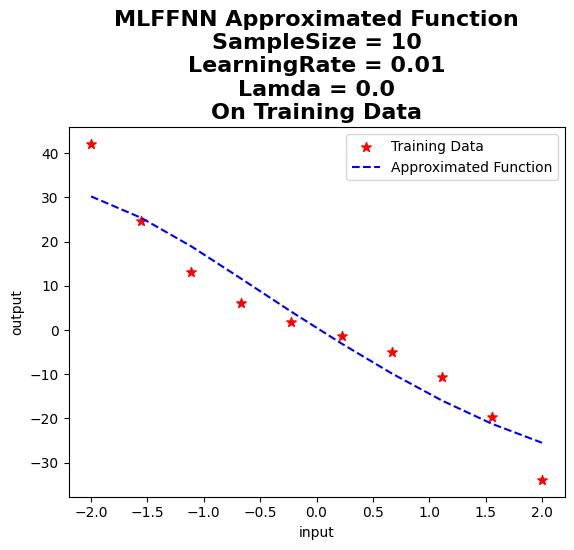

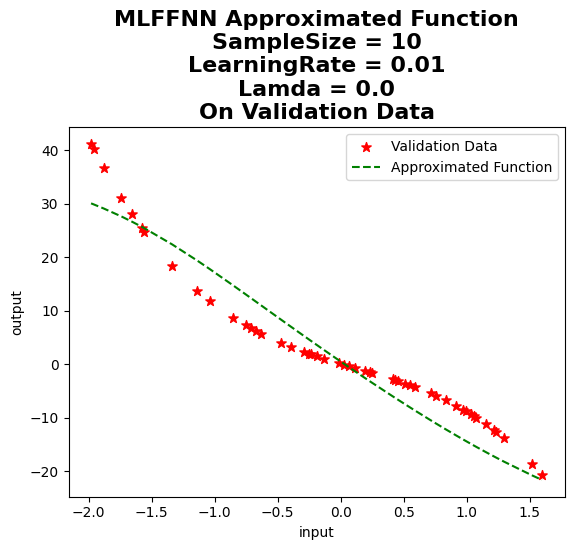

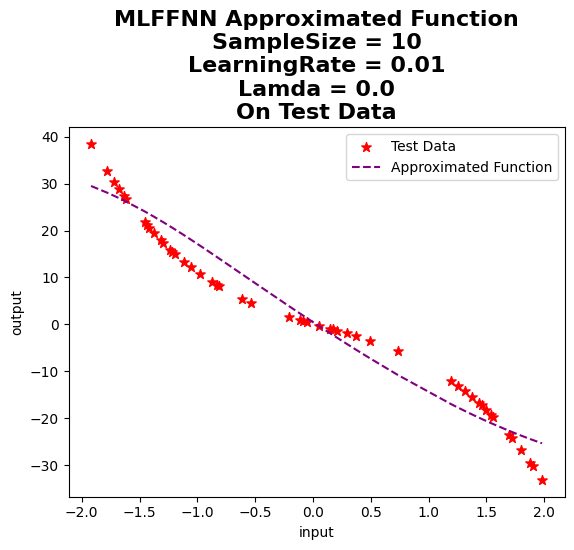

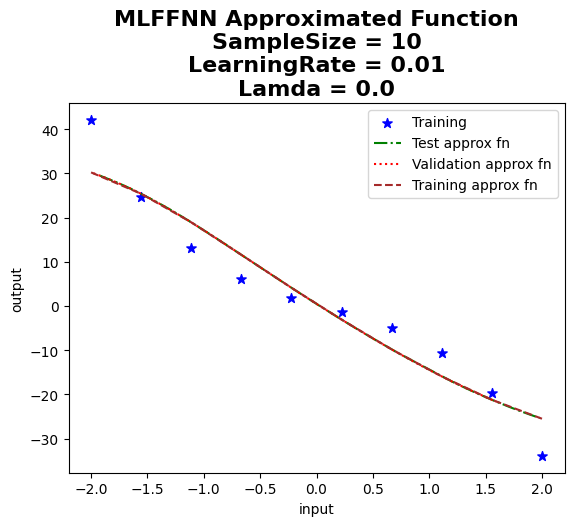

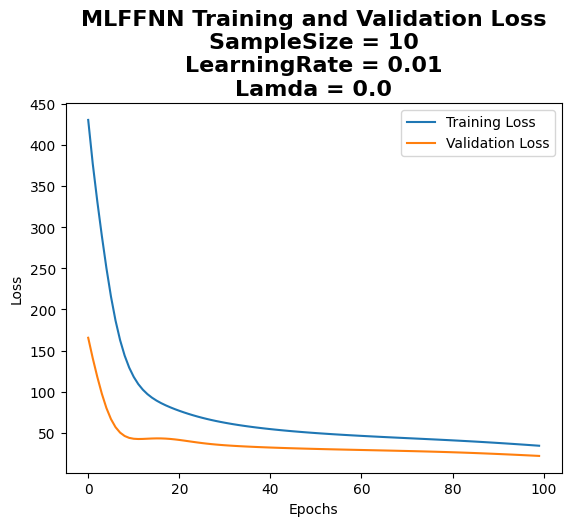

Train Loss: 33.722328186035156
Validation Loss: 21.731775283813477
Test Loss: 16.43081283569336


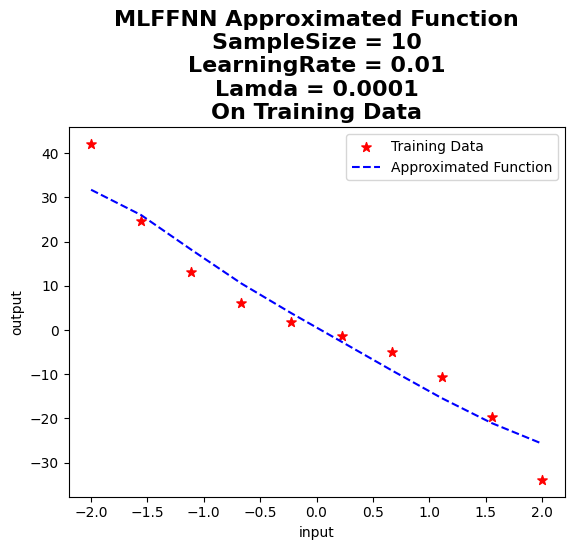

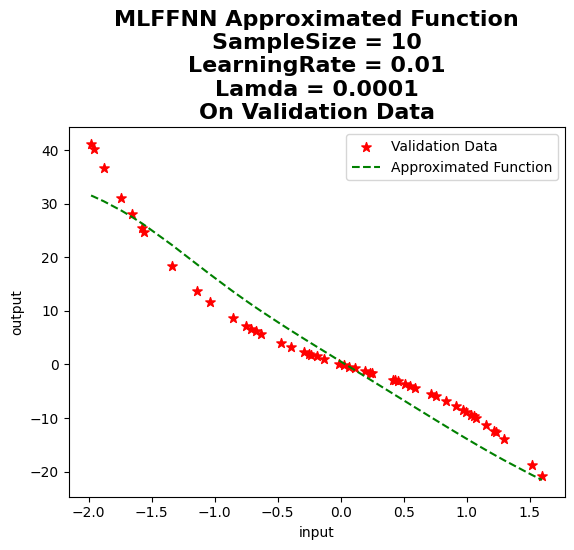

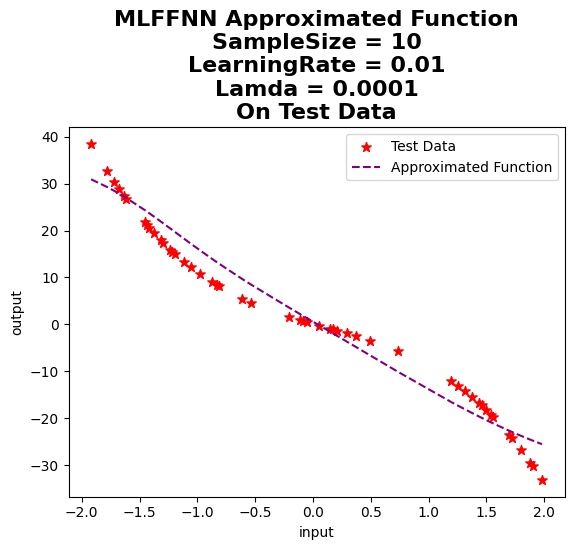

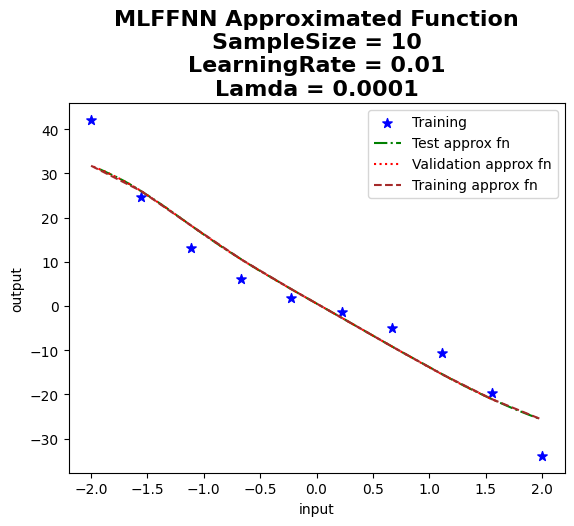

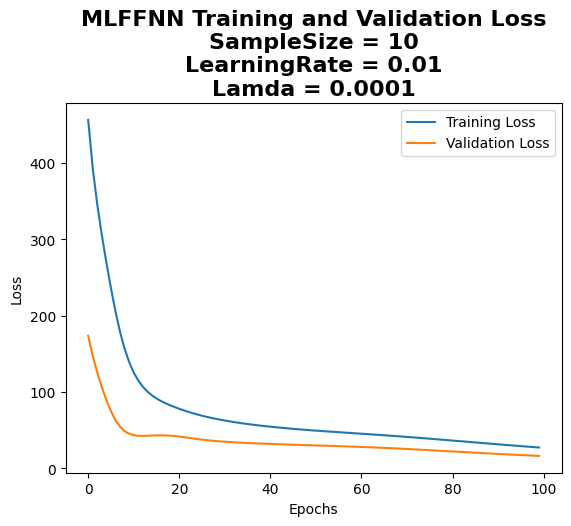

Train Loss: 26.853904724121094
Validation Loss: 16.268171310424805
Test Loss: 13.138153076171875


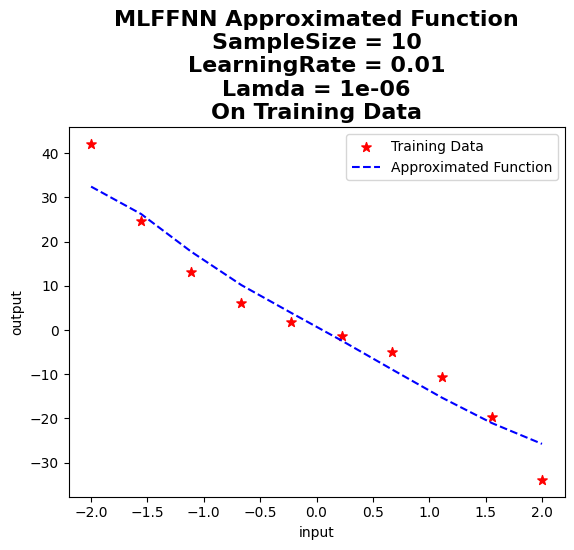

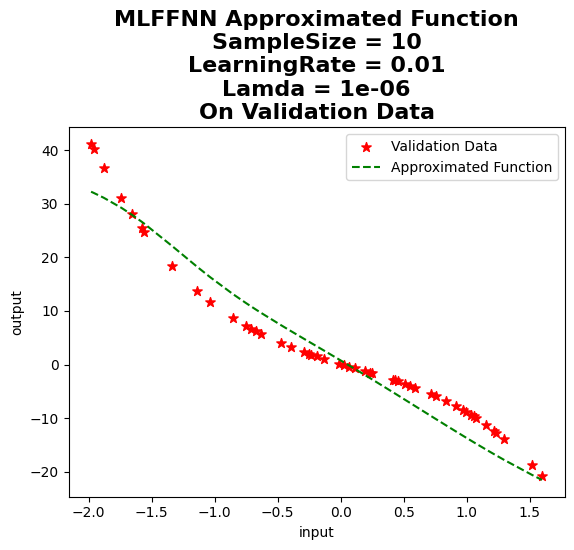

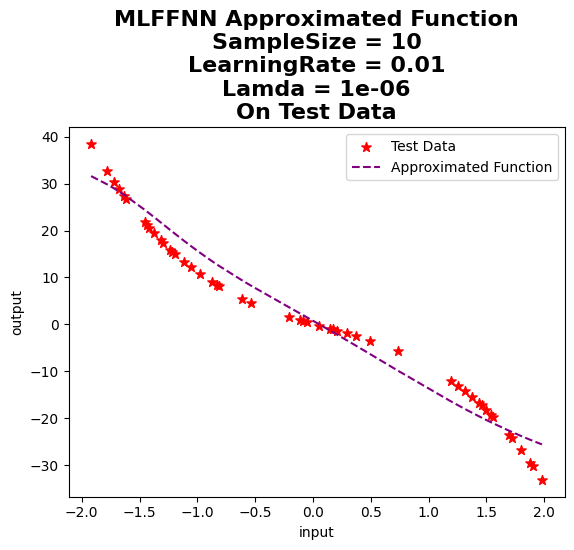

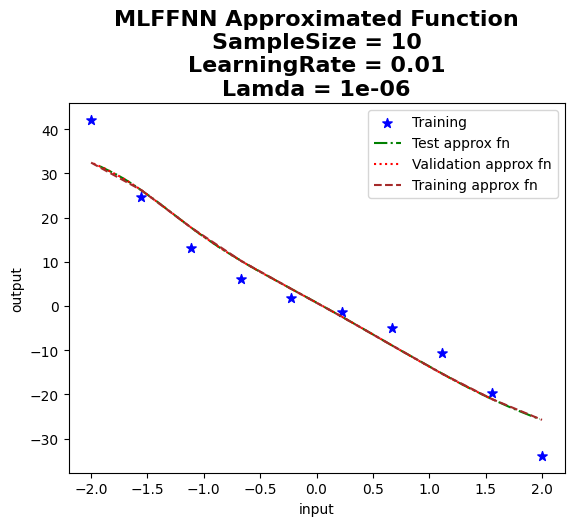

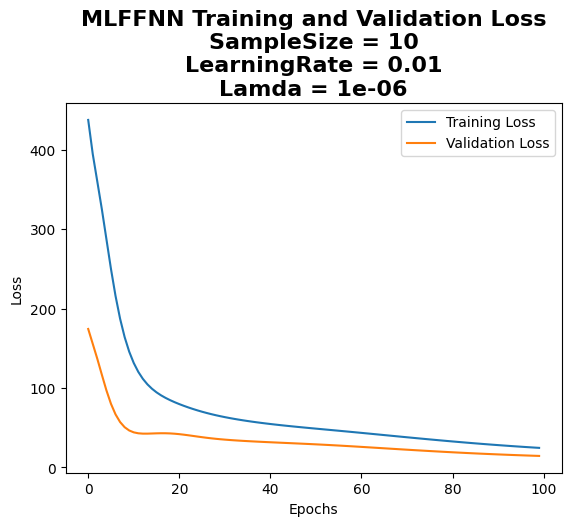

Train Loss: 24.31441879272461
Validation Loss: 14.529779434204102
Test Loss: 11.907434463500977


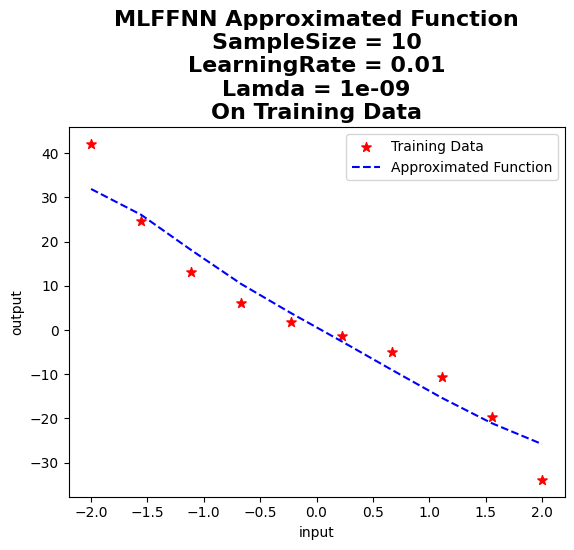

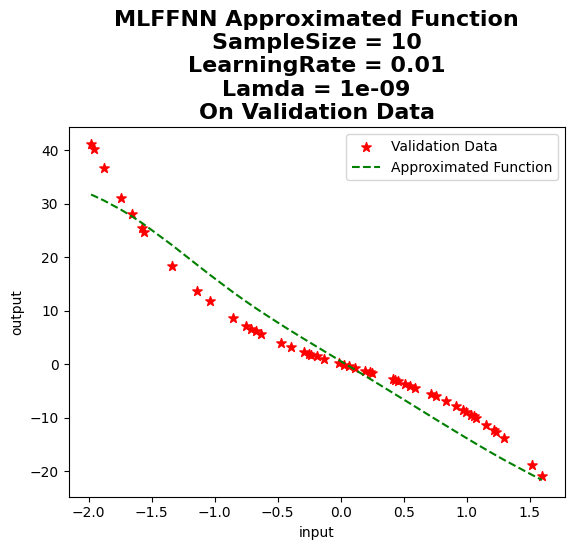

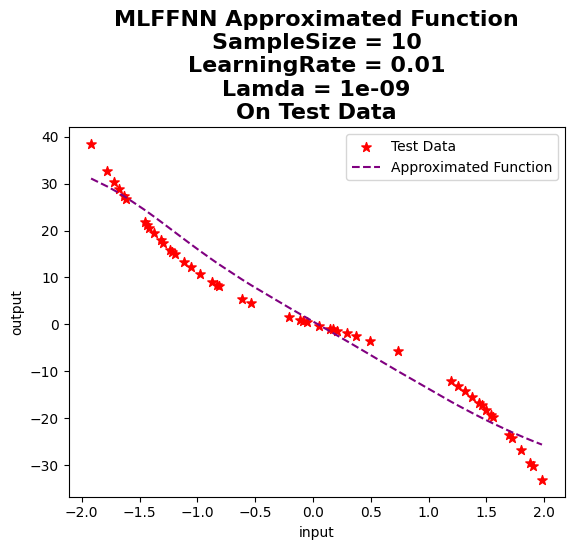

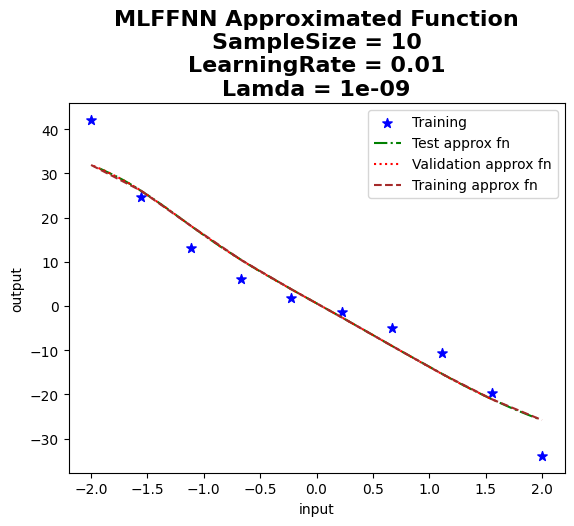

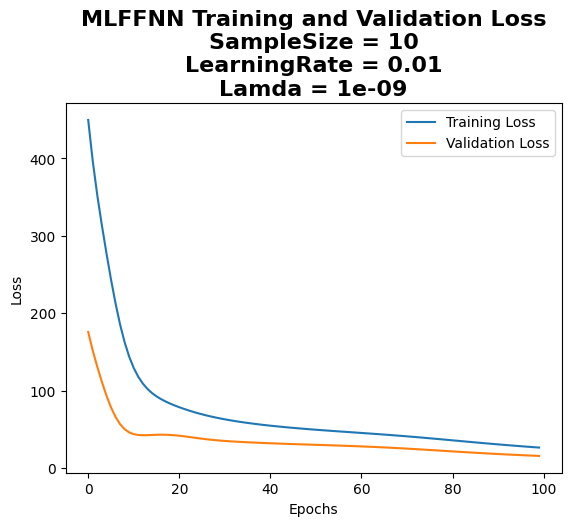

Train Loss: 25.936614990234375
Validation Loss: 15.576831817626953
Test Loss: 12.684453964233398


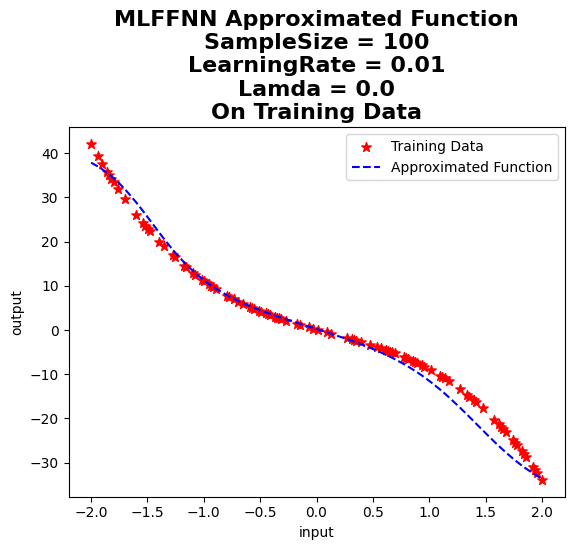

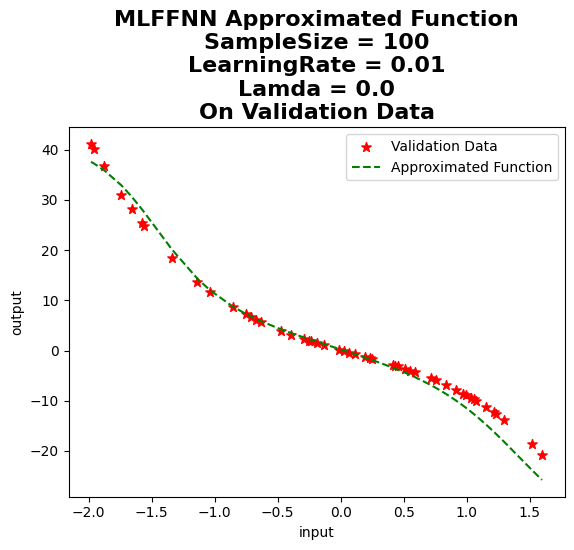

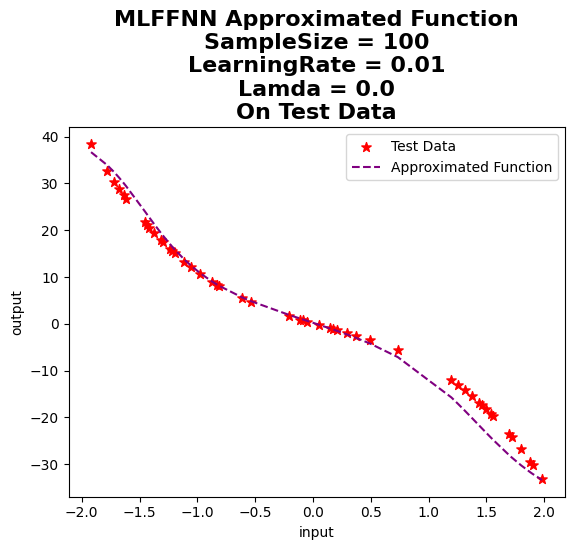

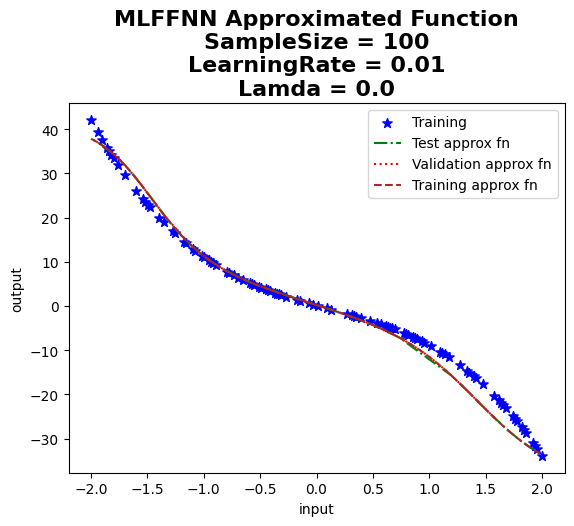

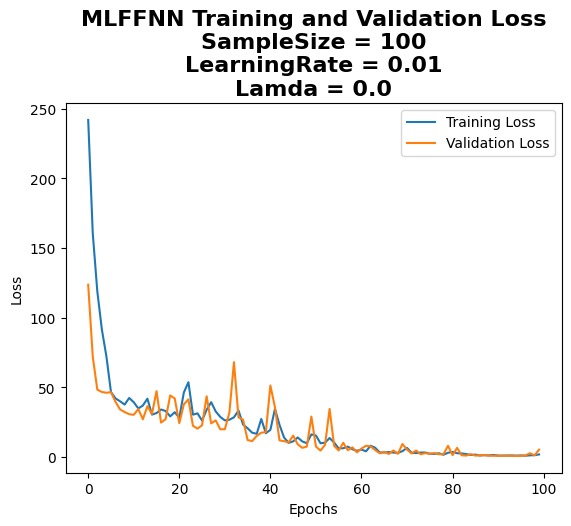

Train Loss: 4.131833076477051
Validation Loss: 5.383443832397461
Test Loss: 8.144916534423828


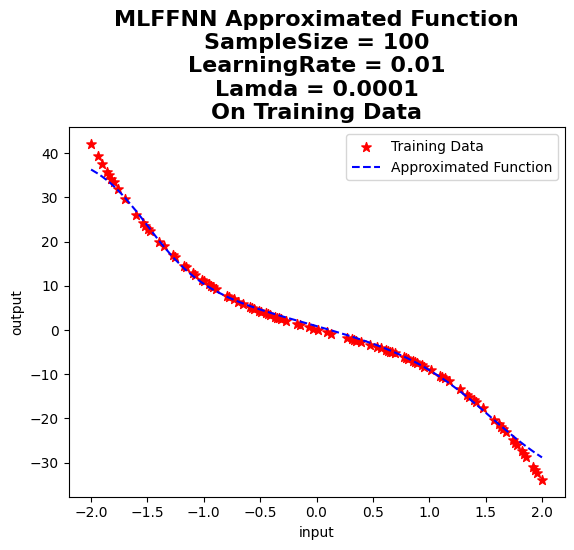

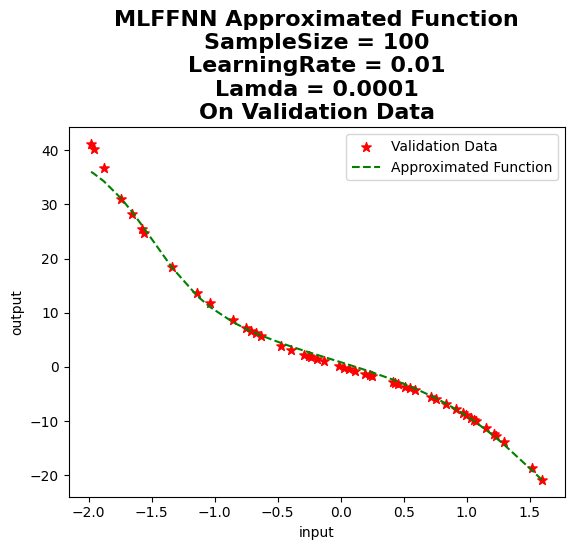

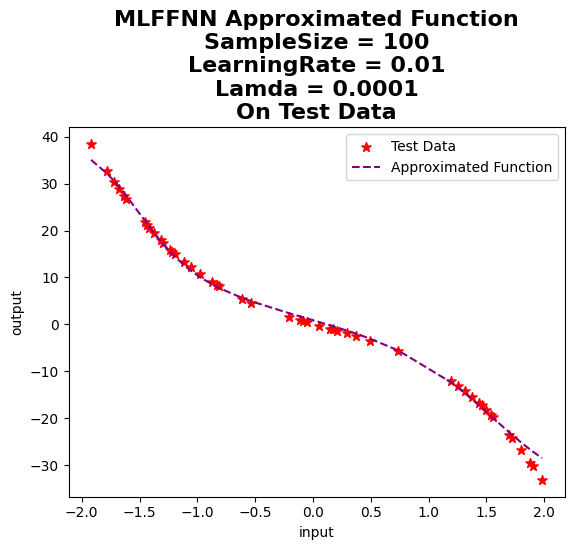

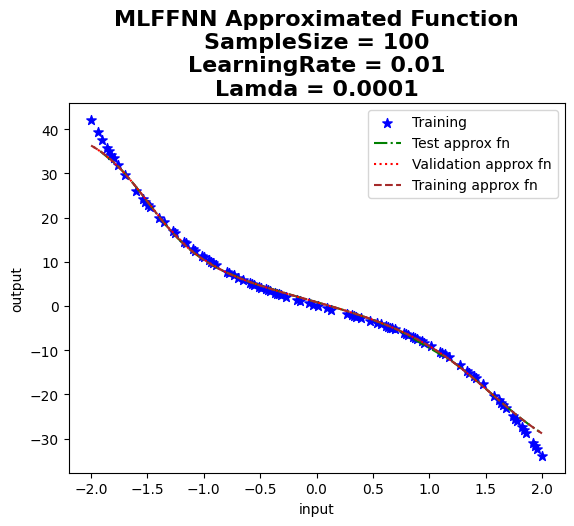

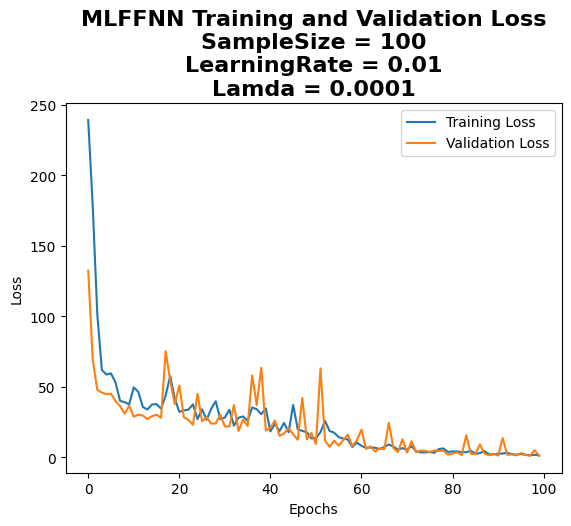

Train Loss: 5.19860315322876
Validation Loss: 1.033278226852417
Test Loss: 1.5653477907180786


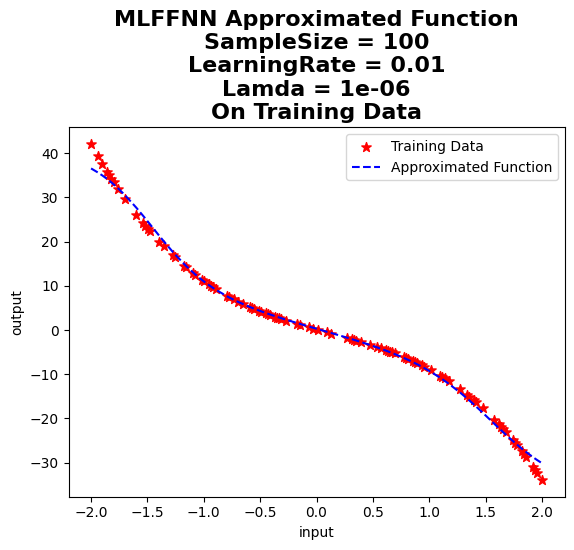

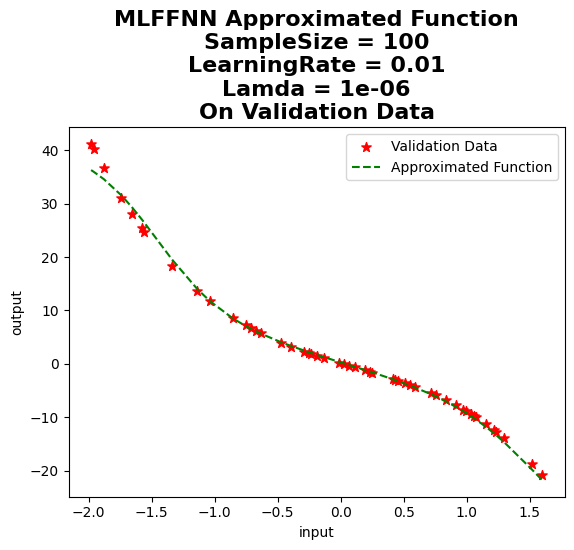

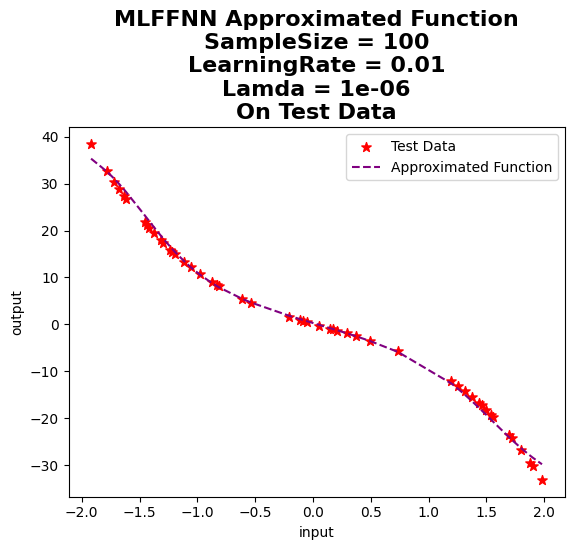

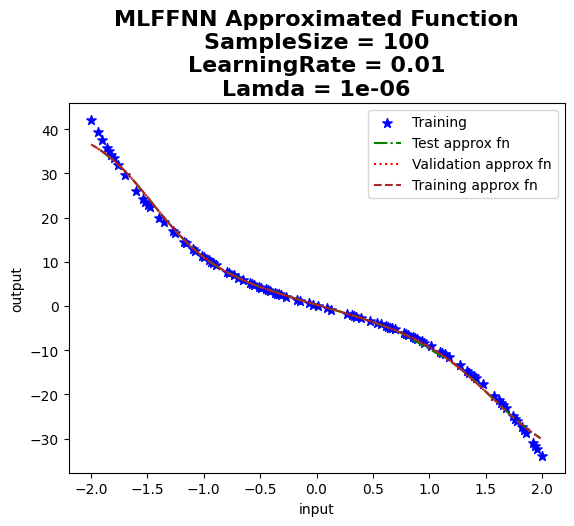

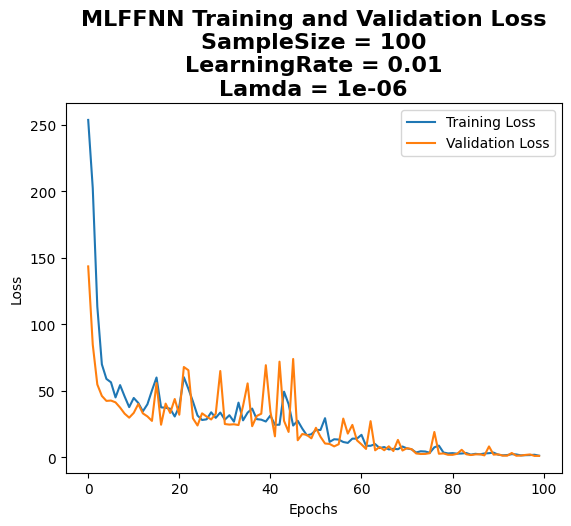

Train Loss: 2.794675350189209
Validation Loss: 1.0012025833129883
Test Loss: 1.1127750873565674


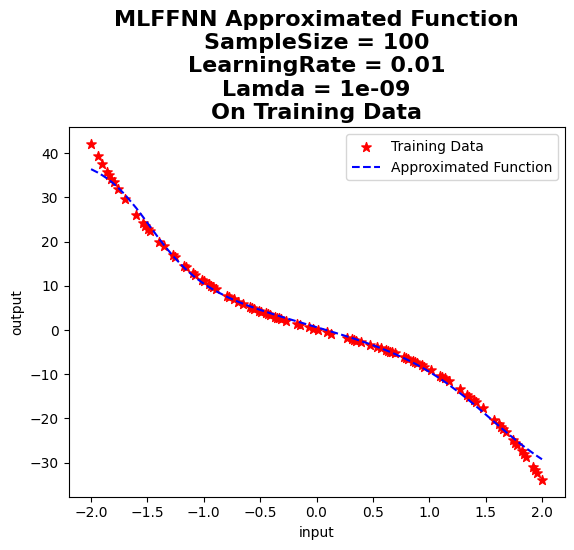

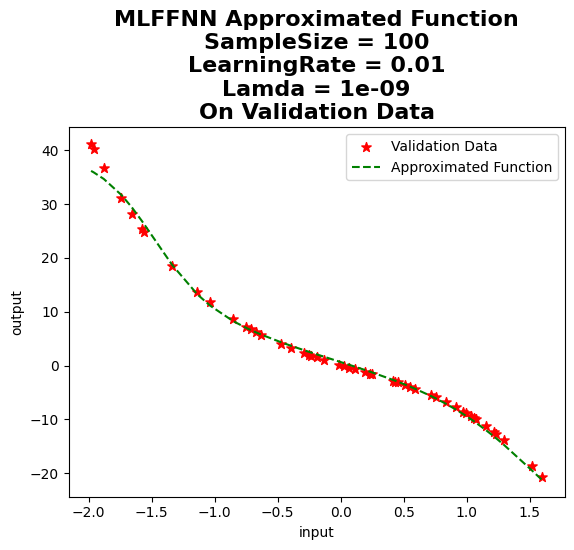

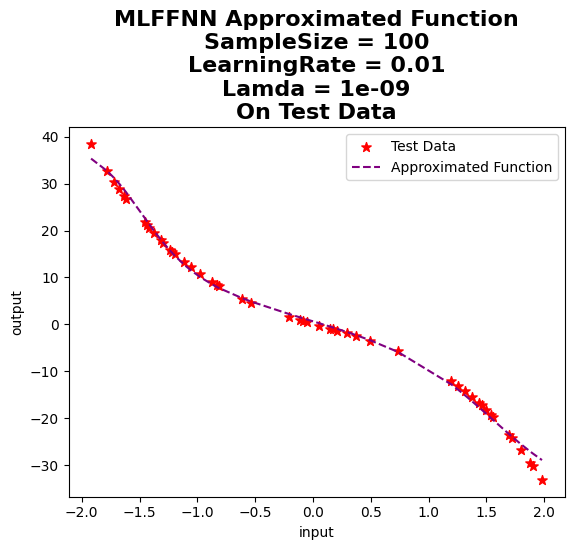

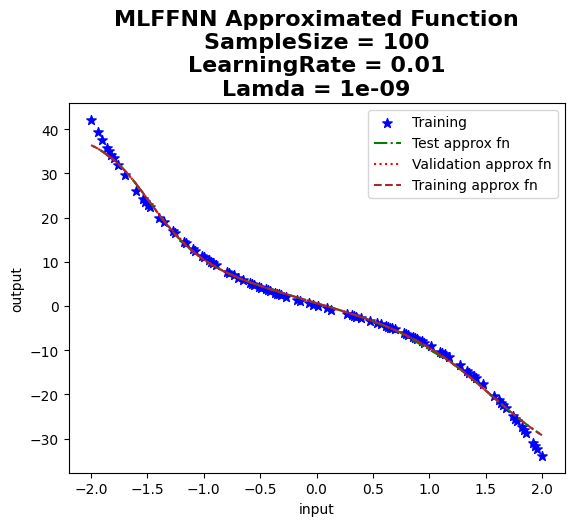

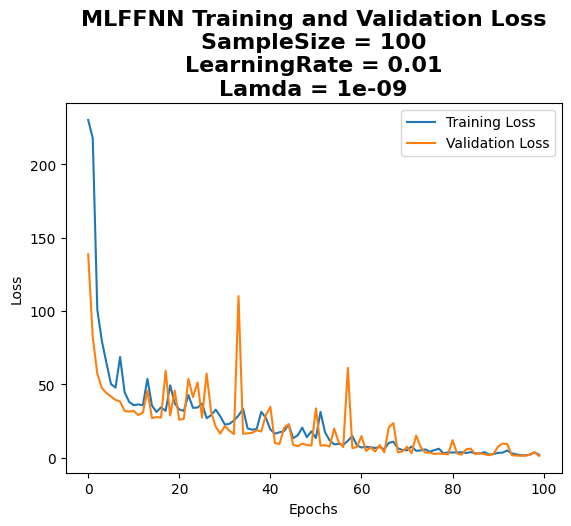

Train Loss: 4.319466590881348
Validation Loss: 1.0803258419036865
Test Loss: 1.4277446269989014
Index Sample Size  Learning Rate            λ  Train Erms  Validate Erms  Test Erms
    1          10           0.01 0.000000e+00   27.834149      21.026590  26.127220
    2          10           0.01 1.000000e-04   27.902930      20.970128  26.117534
    3          10           0.01 1.000000e-06   27.945454      20.974858  26.110465
    4          10           0.01 1.000000e-09   27.917100      20.956967  26.122703
    5         100           0.01 0.000000e+00   25.827201      21.172466  27.192823
    6         100           0.01 1.000000e-04   24.246521      19.992520  25.382905
    7         100           0.01 1.000000e-06   24.617304      20.228731  25.848732
    8         100           0.01 1.000000e-09   24.447325      20.188493  25.624063


In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

column_names = [
    "Index",
    "Sample Size",
    "Learning Rate",
    "λ",
    "Train Erms",
    "Validate Erms",
    "Test Erms",
]
table_index = 0
table_df = pd.DataFrame(columns=column_names)

def build_and_train_model(train_x, train_y, val_x, val_y, learning_rate, lamda):
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Define the model architecture
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='tanh', kernel_regularizer=tf.keras.regularizers.L1(lamda), input_shape=(1,)),
            tf.keras.layers.Dense(1, activation='linear')
        ])
    
    # Compile the model with the specified learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    # Train the model
    result = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=100, verbose=0)

    return model, result


def evaluate_model(model, x, y):

    loss = model.evaluate(x, y, verbose=0)

    y_pred = model.predict(x, verbose=0)

    return loss, y_pred

def add_data_to_table(sample_size, learning_rate, lamda, train_erms, validate_erms, test_erms):
    row_data = {}
    global table_df
    global table_index
    table_index = table_index + 1
    row_data["Index"] = table_index
    row_data["Sample Size"] = sample_size
    row_data["Learning Rate"] = learning_rate
    row_data["λ"] = lamda
    row_data["Train Erms"] = train_erms
    row_data["Validate Erms"] = validate_erms
    row_data["Test Erms"] = test_erms
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        table_df = pd.concat(
            [table_df, pd.DataFrame(row_data, index=[0])], ignore_index=True
        )


def print_table():
    print(table_df.to_string(index=False))

def get_N(x):
    N = len(x)
    return N

def get_erms(y, t):
    y_mse = tf.reduce_mean(tf.square(t-y))
    erms = np.sqrt(y_mse)
    return erms

def plot_loss(result, sample_size, learning_rate, lamda):

    # Plot training loss
    plt.plot(result.history['loss'], label='Training Loss')
    plt.plot(result.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plot_title = "MLFFNN Training and Validation Loss\nSampleSize = " + str(sample_size) + "\nLearningRate = "+str(learning_rate)+"\nLamda = "+str(lamda)
    plt.title(plot_title, fontsize=16, weight='bold')
    plt.legend()
    # plt.savefig("/home/dipendu/programs/mtech_2023/ml/ass2/trial/reg_1/"+plot_title+'.png')
    plt.show()

def plot_data(x, y, pred_y, x_color, y_color, scatter_label, plot_label, x_label, y_label, plot_title):
    
    plt.scatter(x, y, color=x_color, label=scatter_label, marker="*", s=50)
    plt.plot(x, pred_y, color=y_color, label=plot_label, linestyle="--")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title, fontsize=16, weight='bold')
    plt.legend()
    # plt.savefig("/home/dipendu/programs/mtech_2023/ml/ass2/trial/reg_1/"+plot_title+'.png')
    plt.show()

def scatter_plot(x, y, x_label, y_label, plot_title, plot_color):
    plt.scatter(x, y, color=plot_color, label=plot_title, marker="*", s=50)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    # plt.show()


def line_plot(polyline, y, plot_label, plot_color, lines):
    plt.plot(polyline, y, color=plot_color, label=plot_label, linestyle=lines)
    plt.legend()
    # plt.show()

def plot_all_data(train_x, train_y, train_y_pred, val_x, val_y, val_y_pred, test_x, test_y, test_y_pred, sample_size, learning_rate, lamda):
    
    # Plotting
    # fig = plt.figure(figsize=(15, 5))
    title = "MLFFNN Approximated Function\nSampleSize = " + str(sample_size) + "\nLearningRate = " + str(learning_rate) + "\nLamda = "+str(lamda)+"\nOn "
    # Plot the approximated functions obtained using training data
    # ax1 = fig.add_subplot(131)
    # plot_data(train_x, train_y, train_y_pred, 'r', 'b', 'Training Data', 'Approximated Function', 'input', 'output', title+'Training Data', ax1)
    plot_data(train_x, train_y, train_y_pred, 'r', 'b', 'Training Data', 'Approximated Function', 'input', 'output', title+'Training Data')
    # Plot the approximated functions obtained using validation data
    # ax2 = fig.add_subplot(132)
    # plot_data(val_x, val_y, val_y_pred, 'r', 'g', 'Validation Data', 'Approximated Function', 'input', 'output', title+'Validation Data', ax2)
    plot_data(val_x, val_y, val_y_pred, 'r', 'g', 'Validation Data', 'Approximated Function', 'input', 'output', title+'Validation Data')
    # Plot the approximated functions obtained using test data
    # ax3 = fig.add_subplot(133)
    # plot_data(test_x, test_y, test_y_pred, 'r', 'purple', 'Test Data', 'Approximated Function', 'input', 'output', title + 'Test Data', ax3)
    plot_data(test_x, test_y, test_y_pred, 'r', 'purple', 'Test Data', 'Approximated Function', 'input', 'output', title + 'Test Data')
    # plt.tight_layout()
    # plt.show()
    
def plot_together(train_x, train_y, train_y_pred, val_x, val_y, val_y_pred, test_x, test_y, test_y_pred, sample_size, learning_rate, lamda):

    title = "MLFFNN Approximated Function\nSampleSize = " + str(sample_size) + "\nLearningRate = " + str(learning_rate)+ "\nLamda = "+str(lamda)
    plot_title = "Training"
    scatter_plot(train_x, train_y, "input", "output", plot_title, "blue")
    plot_title = "Test approx fn"
    line_plot(test_x, test_y_pred, plot_title, "green", "-.")
    plot_title = "Validation approx fn"
    line_plot(val_x, val_y_pred, plot_title, "red", ":")
    plot_title = "Training approx fn"
    line_plot(train_x, train_y_pred, plot_title, "brown", "--")
    plot_title = title
    # plt.savefig("/home/dipendu/programs/mtech_2023/ml/ass2/trial/reg_1/"+plot_title+'.png')
    plt.title(plot_title, fontsize=16, weight='bold')
    plt.show()


def plot_graphs(train_x, train_y, val_x, val_y, test_x, test_y, sample_size, regularization_coefficients, learning_rate=0.1):

    for lamda in regularization_coefficients:
        model, result = build_and_train_model(train_x, train_y, val_x, val_y, learning_rate, lamda)
        
        train_loss, train_y_pred = evaluate_model(model, train_x, train_y)
        val_loss, val_y_pred = evaluate_model(model, val_x, val_y)
        test_loss, test_y_pred = evaluate_model(model, test_x, test_y)
        
        train_erms = get_erms(train_y_pred, train_y)
        validate_erms = get_erms(val_y_pred, val_y)
        test_erms = get_erms(test_y_pred, test_y)
        
        # Plot all the graphs
        plot_all_data(train_x, train_y, train_y_pred, val_x, val_y, val_y_pred, test_x, test_y, test_y_pred, sample_size, learning_rate, lamda)
        
        plot_together(train_x, train_y, train_y_pred, val_x, val_y, val_y_pred, test_x, test_y, test_y_pred, sample_size, learning_rate, lamda)

        # Plot training loss
        plot_loss(result, sample_size, learning_rate, lamda)

        add_data_to_table(sample_size, learning_rate, lamda, train_erms, validate_erms, test_erms)

        # Print train loss
        print("Train Loss:", train_loss)
        # Print validation loss
        print("Validation Loss:", val_loss)
        # Print test loss
        print("Test Loss:", test_loss)

def main():
    folder_number = "9"
    current_directory = os.getcwd()
    # regression_dataset_1_path=current_directory+ "/Datasets_for_A1/Regression/Dataset 1/"+folder_number+"/"
    regression_dataset_1_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass2/Datasets_for_A1/Regression/Dataset 1/"
        + folder_number
        + "/"
    )

    regression_dataset_1_Train_Sample_1 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-1.csv"
    )
    df = pd.read_csv(regression_dataset_1_Train_Sample_1)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_1 = sorted_data[:, 1]
    train_y_1 = sorted_data[:, 2]

    regression_dataset_1_Train_Sample_2 = (
        regression_dataset_1_path + "Train-" + folder_number + "-Sample-2.csv"
    )
    df = pd.read_csv(regression_dataset_1_Train_Sample_2)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    train_x_2 = sorted_data[:, 1]
    train_y_2 = sorted_data[:, 2]


    regression_dataset_1_validation = (
        regression_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_validation)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    val_x = sorted_data[:, 1]
    val_y = sorted_data[:, 2]

    regression_dataset_1_test = (
        regression_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_test)
    data = df.to_numpy()
    sorted_data = data[data[:, 1].argsort()]
    test_x = sorted_data[:, 1]
    test_y = sorted_data[:, 2]

    learning_rates = [0.01]
    regularization_coefficients = [0.0, 0.0001, 1e-6, 1e-9]

    sample_size = get_N(train_x_1)
    for learning_rate in learning_rates:
        plot_graphs(
            train_x_1,
            train_y_1,
            val_x,
            val_y,
            test_x,
            test_y,
            sample_size,
            regularization_coefficients,
            learning_rate,
        )

    sample_size = get_N(train_x_2)
    for learning_rate in learning_rates:
        plot_graphs(
            train_x_2,
            train_y_2,
            val_x,
            val_y,
            test_x,
            test_y,
            sample_size,
            regularization_coefficients,
            learning_rate,
        )

    print_table()


if __name__ == "__main__":
    main()